University of Helsinki, Master's Programme in Data Science  
DATA16001 Network Analysis - Spring 2025  
Michail Mathioudakis  

# Assignment: Girvan-Newman (due on March 4)


Consider the undirected graph in the figure below, and the Girvan-Newman algorithm as defined in the textbook's Section 3.6.A.

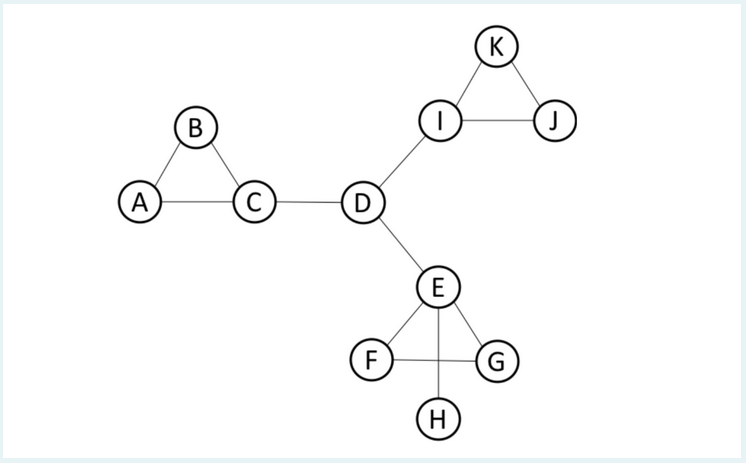

#### Exercise.

What are the partitions identified by the Girvan-Newman algorithm after 1, 2, 3, 4, and 5 steps? Explain your answer.

Notes:

- It is optional to produce figures for your answer. If you do, please attach them (do not insert them in the textbox).
- It is optional to use software for your solution. If you do, please attach it as instructed at the bottom of the assignment.




In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
graph_edges = [
	("A", "B"), ("A", "C"), ("B", "C"), ("C", "D"), ("D", "E"), ("D", "I"), ("E", "F")
	,("E", "G"), ("E", "H"), ("F", "G"), ("I", "K"), ("I", "J"), ("J", "K")
]

G = nx.Graph()
G.add_edges_from(graph_edges)

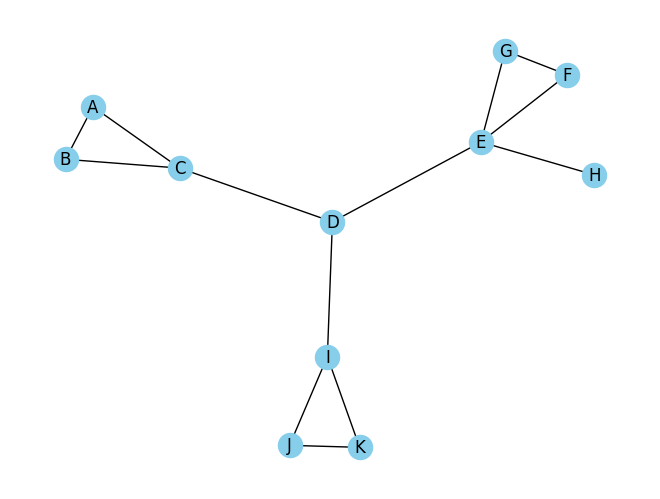

In [4]:
pos = nx.spring_layout(G, seed = 12)
nx.draw(G, pos, node_color="skyblue", with_labels = True)
plt.show()

In [5]:
print(f"initial edge betwenness centrality list:")
print(f"{nx.edge_betweenness_centrality(G)}")
print(f"sorted initial edge betwenness centrality list:")
print(f"{sorted(nx.edge_betweenness_centrality(G).items(), key = lambda item: item[1], reverse = True)}")

initial edge betwenness centrality list:
{('A', 'B'): 0.01818181818181818, ('A', 'C'): 0.16363636363636364, ('B', 'C'): 0.16363636363636364, ('C', 'D'): 0.43636363636363634, ('D', 'E'): 0.509090909090909, ('D', 'I'): 0.43636363636363634, ('E', 'F'): 0.16363636363636364, ('E', 'G'): 0.16363636363636364, ('E', 'H'): 0.18181818181818182, ('I', 'K'): 0.16363636363636364, ('I', 'J'): 0.16363636363636364, ('F', 'G'): 0.01818181818181818, ('K', 'J'): 0.01818181818181818}
sorted initial edge betwenness centrality list:
[(('D', 'E'), 0.509090909090909), (('C', 'D'), 0.43636363636363634), (('D', 'I'), 0.43636363636363634), (('E', 'H'), 0.18181818181818182), (('A', 'C'), 0.16363636363636364), (('B', 'C'), 0.16363636363636364), (('E', 'F'), 0.16363636363636364), (('E', 'G'), 0.16363636363636364), (('I', 'K'), 0.16363636363636364), (('I', 'J'), 0.16363636363636364), (('A', 'B'), 0.01818181818181818), (('F', 'G'), 0.01818181818181818), (('K', 'J'), 0.01818181818181818)]


In [6]:
def gn(G, iterations):
	graph = G.copy()
	for i in range(iterations):
		edge_betweenness = nx.edge_betweenness_centrality(
			graph
			,k = None
			,normalized = True
			,weight = None
			,seed = None
		)
		sorted_edge_betweenness = dict(
			sorted(edge_betweenness.items(), key = lambda item: item[1], reverse = True)
		)
		highest_edge_betweenness = list(sorted_edge_betweenness.values())[0] if len(list(sorted_edge_betweenness.values())) > 0 else 0
		highest_edge_betweenness_list = [key for key, x in sorted_edge_betweenness.items() if x == highest_edge_betweenness]
		print(f"iteration: { i + 1 }")
		print(f"removed edge list: {highest_edge_betweenness_list}, for edge betwenness value: {highest_edge_betweenness}")
		graph.remove_edges_from(highest_edge_betweenness_list)
	return graph

In [7]:
one_step_graph = gn(G, 1)
two_step_graph = gn(one_step_graph, 1)
three_step_graph = gn(two_step_graph, 1)
four_step_graph = gn(three_step_graph, 1)
five_step_graph = gn(four_step_graph, 1)

iteration: 1
removed edge list: [('D', 'E')], for edge betwenness value: 0.509090909090909
iteration: 1
removed edge list: [('C', 'D'), ('D', 'I')], for edge betwenness value: 0.21818181818181817
iteration: 1
removed edge list: [('E', 'H')], for edge betwenness value: 0.05454545454545454
iteration: 1
removed edge list: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('E', 'F'), ('E', 'G'), ('I', 'K'), ('I', 'J'), ('F', 'G'), ('K', 'J')], for edge betwenness value: 0.01818181818181818
iteration: 1
removed edge list: [], for edge betwenness value: 0


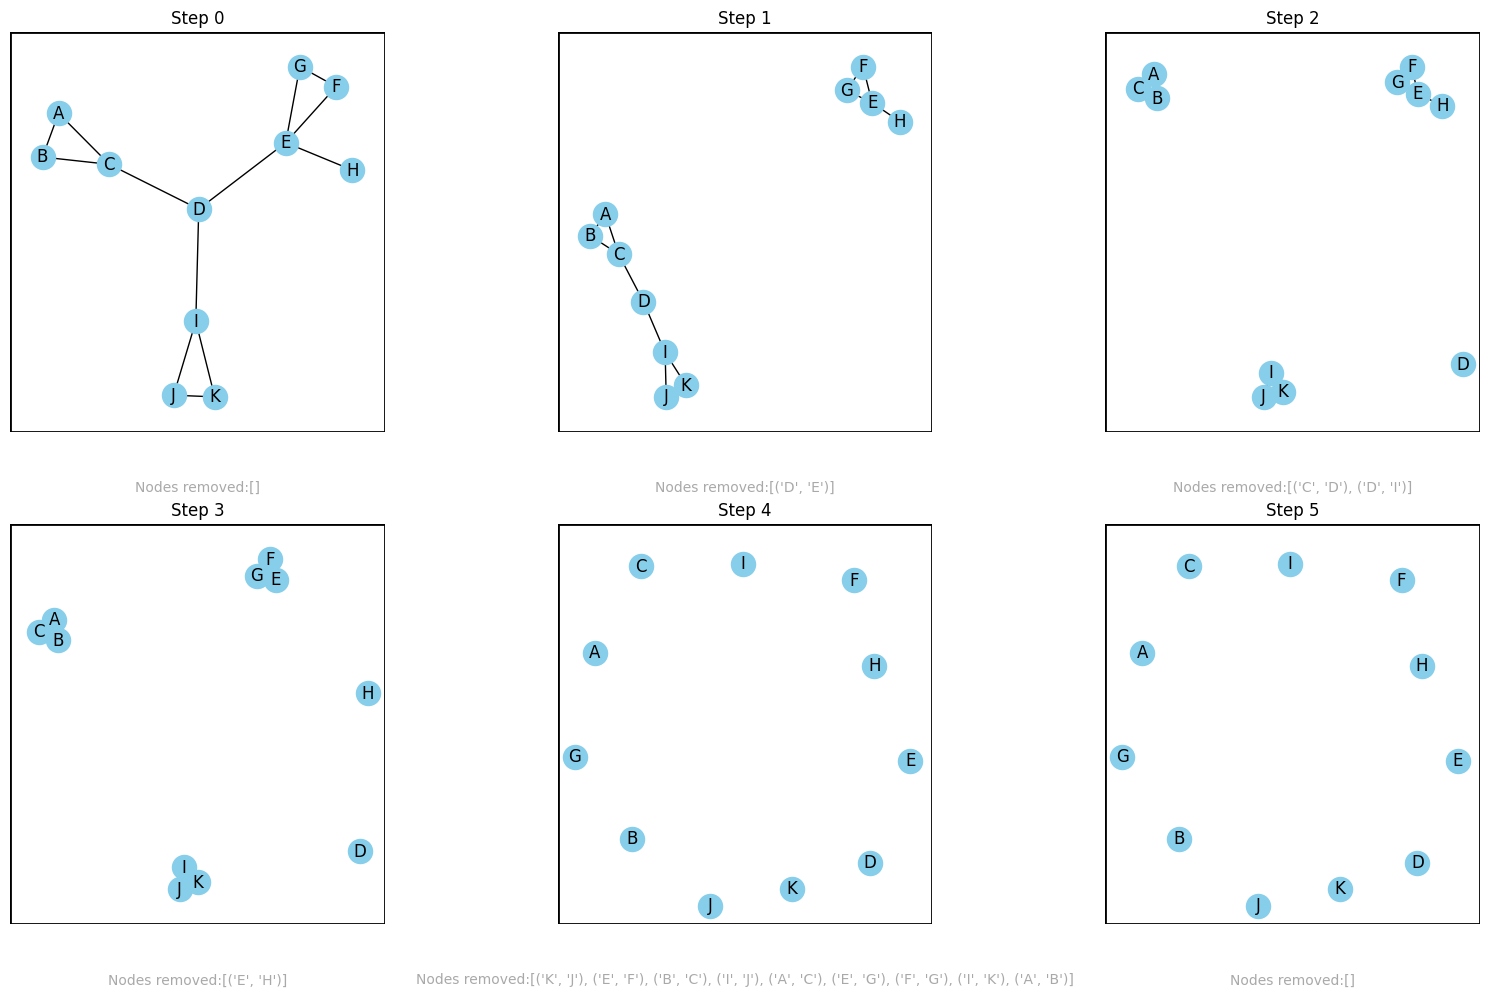

In [8]:
from matplotlib.patches import Rectangle
graph_list = [G, one_step_graph, two_step_graph, three_step_graph, four_step_graph, five_step_graph] 
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

prev_graph = graph_list[0].copy()
for idx, graph in enumerate(graph_list):
	row = idx // 3  # row index (0 for first row, 1 for second)
	col = idx % 3   # column index (0, 1, or 2)
	pos = nx.spring_layout(graph, seed = 12)
	nx.draw(graph, pos = pos, ax = axs[row, col], node_color = "skyblue", with_labels = True)
	axs[row, col].set_title(f"Step {idx}")
	removed_nodes = set(prev_graph.edges()).symmetric_difference(set(graph.edges()))
	axs[row, col].text(0.5, -0.15, f"Nodes removed:{list(removed_nodes)}",
					transform=axs[row, col].transAxes,
					ha="center", fontsize=10, color="darkgrey")
	
	for spine in axs[row, col].spines.values():
		spine.set_edgecolor("black")
		spine.set_linewidth(1.5)
	
	rect = Rectangle((0, 0), 1, 1, transform = axs[row, col].transAxes, fill = False, edgecolor = "black", linewidth = 2)
	axs[row, col].add_patch(rect)
	prev_graph = graph.copy()

plt.tight_layout()  # Adjust spacing between plots
plt.show()


### Answer

We can be seen from the plots that after 1 step the graph is split in 2 partitions, $\{A, B, C, D, I, J, K\}$ and $\{E, F, G, H\}$ because the highest edge betweenness is found in (D, E) with value ~0.5. After 2 steps the graph is split in 4 partitions $\{A, B, C\}$, $\{D\}$, $\{E, F, G, H\}$ and $\{I, J, K\}$, with highest edge betweenness found in (C, D) and (D, I) with value ~0.22. After 3 steps the graph is split in 5 partitions $\{A, B, C\}$, $\{D\}$, $\{E, F, G\}$, $\{H\}$ and $\{I, J, K\}$ with highest edge betweenness found in  (E, H) for edge betwenness value ~0.05. After 4 steps the graph remains without edges since the edge betweenness is positive constant between all edges remaining.

In [9]:
textbook_graph_edges = [
	("1", "2"), ("1", "3"), ("2", "3"), ("2", "4"), ("2", "5"), ("3", "4"), ("3", "5")
	,("4", "5"), ("5", "6"), ("5", "7"), ("6", "7"), ("7", "8"), ("7", "9"), ("7", "10"), ("8", "9")
	,("8", "10"), ("9", "10"), ("9", "11"), ("10", "11")
]

textbook_graph = nx.Graph()
textbook_graph.add_edges_from(textbook_graph_edges)

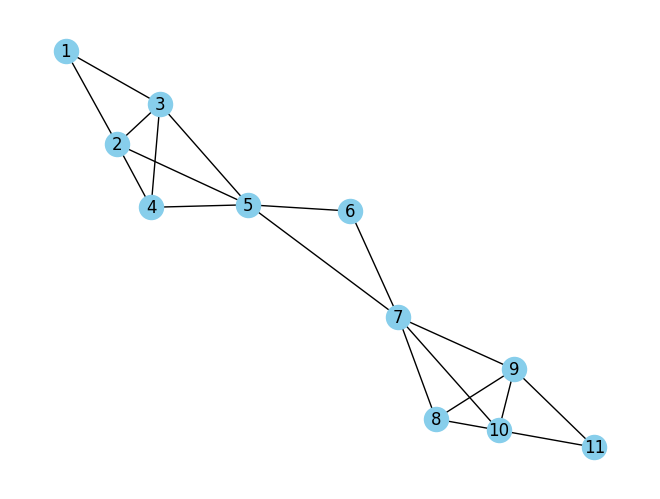

In [10]:
pos = nx.spring_layout(textbook_graph, seed = 12)
nx.draw(textbook_graph, pos, node_color="skyblue", with_labels = True)
plt.show()

iteration: 1
removed edge list: [('5', '7')], for edge betwenness value: 0.45454545454545453
iteration: 2
removed edge list: [('5', '6'), ('6', '7')], for edge betwenness value: 0.5454545454545454


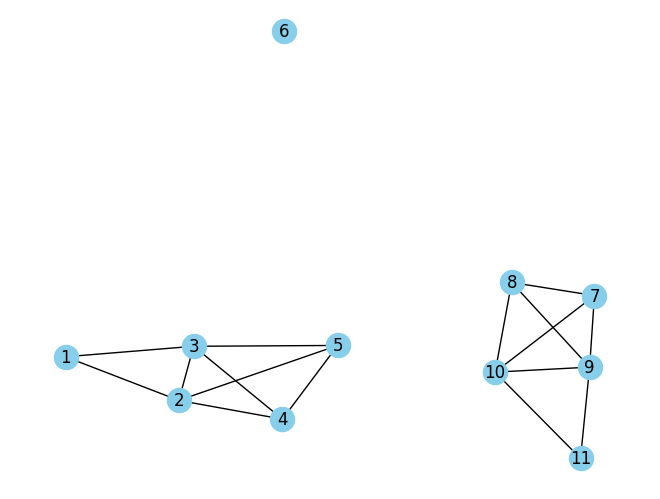

In [11]:
two_step_textbook_graph = gn(textbook_graph, 2)
pos = nx.spring_layout(two_step_textbook_graph, seed = 12, k = 0.3, iterations = 20)
nx.draw(two_step_textbook_graph, pos, node_color="skyblue", with_labels = True)
plt.show()

In [12]:
textbook_graph_2_edges = [
	("1", "2"), ("1", "3"), ("2", "3"), ("3", "7"), ("4", "5"), ("4", "6"), ("5", "6")
	,("6", "7"), ("7", "8"), ("8", "9"), ("8", "12"), ("9", "10"), ("9", "11"), ("10", "11"), ("12", "13")
	,("12", "14"), ("13", "14")
]

textbook_graph_2 = nx.Graph()
textbook_graph_2.add_edges_from(textbook_graph_2_edges)

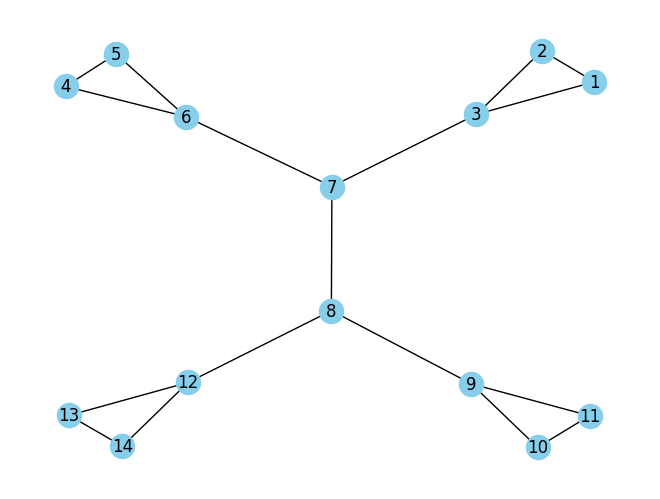

In [13]:
pos = nx.spring_layout(textbook_graph_2, seed = 13)
nx.draw(textbook_graph_2, pos, node_color="skyblue", with_labels = True)
plt.show()

iteration: 1
removed edge list: [('7', '8')], for edge betwenness value: 0.5384615384615385
iteration: 2
removed edge list: [('3', '7'), ('7', '6'), ('8', '9'), ('8', '12')], for edge betwenness value: 0.13186813186813187


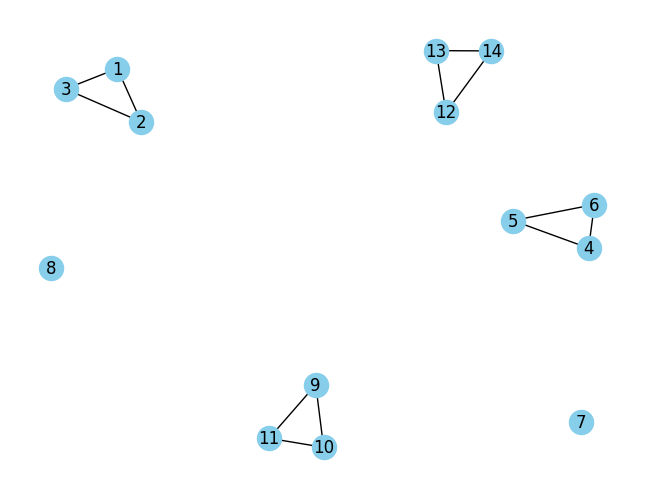

In [14]:
two_step_textbook_graph_2 = gn(textbook_graph_2, 2)
pos = nx.spring_layout(two_step_textbook_graph_2, seed = 12, k = 0.3, iterations = 20)
nx.draw(two_step_textbook_graph_2, pos, node_color="skyblue", with_labels = True)
plt.show()